In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
pd.set_option("display.max.columns", None)

In [3]:
os.getcwd()

'/Users/memanuel0109/Code/Github/Guided_Capstone_One'

In [4]:
os.chdir('data')

In [5]:
os.listdir()

['updated_ski_data.csv',
 '.DS_Store',
 'step2_output.csv',
 'ski_data.csv',
 'step3_output.csv']

In [7]:
dataframe = pd.read_csv('step3_output.csv', index_col=0)

In [8]:
dataframe.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
1,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.000000,45.0,44.0,350.0,47.0,53.0,90.0,0.0,2
2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.000000,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0
3,Arizona Snowbowl,Arizona,11500,2300,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.000000,122.0,81.0,260.0,89.0,89.0,122.0,0.0,1
4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.000000,115.0,49.0,250.0,74.0,78.0,104.0,80.0,1
5,Yosemite Ski & Snowboard Area,California,7800,600,0,0.0,0,0,0,1,3,1,5,10.0,2.0,0.4,88.0,174.873239,110.0,84.0,300.0,47.0,47.0,107.0,0.0,3


## Create dummy features for categorical variables

In [9]:
dummy = pd.get_dummies(dataframe['state'])

In [10]:
df = pd.merge(dummy, dataframe, left_index=True, right_index=True)

In [12]:
df.drop(['state'], axis=1, inplace = True)

In [13]:
df.head()

,Alaska,Arizona,California,Colorado,Connecticut,Idaho,Illinois,Indiana,Iowa,Maine,Maryland,Massachusetts,Michigan,Minnesota,Missouri,Montana,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,Ohio,Oregon,Pennsylvania,Rhode Island,South Dakota,Tennessee,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Eaglecrest Ski Area,2600,1540,0,0.0,0,0,0,0,4,0,4,36.0,1.0,2.0,640.0,60.000000,45.0,44.0,350.0,47.0,53.0,90.0,0.0,2
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Hilltop Ski Area,2090,294,0,0.0,0,0,0,1,0,2,3,13.0,1.0,1.0,30.0,30.000000,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Arizona Snowbowl,11500,2300,0,0.0,1,0,2,2,1,2,8,55.0,4.0,2.0,777.0,104.000000,122.0,81.0,260.0,89.0,89.0,122.0,0.0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sunrise Park Resort,11100,1800,0,0.0,0,1,2,3,1,0,7,65.0,2.0,1.2,800.0,80.000000,115.0,49.0,250.0,74.0,78.0,104.0,80.0,1
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Yosemite Ski & Snowboard Area,7800,600,0,0.0,0,0,0,1,3,1,5,10.0,2.0,0.4,88.0,174.873239,110.0,84.0,300.0,47.0,47.0,107.0,0.0,3


In [14]:
df.shape

(299, 60)

In [15]:
from sklearn.preprocessing import StandardScaler

X = df.drop(['Name','AdultWeekend'], axis=1)
y = df.AdultWeekend 

scaler = StandardScaler().fit(X)

X_scaled = scaler.transform(X) 

In [16]:
len(X_scaled)

299

## Split into training and testing datasets

In [19]:
from sklearn.model_selection import train_test_split
y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

# Modeling


# Model 1

In [20]:
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [21]:
y_pred = model.predict(X_test)

In [22]:
abs_error_1 = mean_absolute_error(y_test, y_pred)
abs_error_1

4109937273107.115

In [23]:
ex_var_score_1 = explained_variance_score(y_test, y_pred)
ex_var_score_1

-1.9161793866698844e+24

In [24]:
lm.intercept_

1030920720739.3376

In [25]:
mod1_df = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])

In [26]:
mod1_df.sort_values('Coefficient', ascending = False, inplace=True)

In [27]:
print(mod1_df.head(10))

                Coefficient
Indiana        1.527279e+13
New York       9.988538e+12
Michigan       9.685651e+12
Pennsylvania   8.110002e+12
California     7.698643e+12
Colorado       7.698643e+12
New Hampshire  7.482011e+12
Wisconsin      7.482011e+12
Vermont        6.779846e+12
Minnesota      6.779846e+12


# Model 2

In [28]:
X = dataframe.drop(['Name','AdultWeekend','state'], axis=1)
y = dataframe.AdultWeekend 
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X) 

In [29]:
y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [30]:
lm2 = linear_model.LinearRegression()
model = lm2.fit(X_train,y_train)

In [31]:
y_pred = model.predict(X_test)

### Review Model Outcomes

In [32]:
abs_error_2 = mean_absolute_error(y_test, y_pred)
abs_error_2

6.703348609641727

In [33]:
ex_var_score_2 = explained_variance_score(y_test, y_pred)
ex_var_score_2

0.7818739341749792

In [34]:
lm2_int = lm2.intercept_
lm2_int

61.87406204359501

In [35]:
mod2_df = pd.DataFrame(abs(lm2.coef_), X.columns, columns=['Coefficient'])

In [36]:
mod2_df.sort_values('Coefficient', ascending = False, inplace=True)

In [37]:
print(mod2_df.head(10))

                   Coefficient
AdultWeekday         18.662606
vertical_drop         2.065506
daysOpenLastYear      1.936725
SkiableTerrain_ac     1.653844
quad                  1.437106
summit_elev           1.272684
averageSnowfall       1.205889
fastSixes             1.151081
surface               0.957410
projectedDaysOpen     0.920095


# Model 3

In [39]:
X = dataframe.drop(['Name','AdultWeekend','state','summit_elev'], axis=1)
y = dataframe.AdultWeekend 
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [40]:
y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [41]:
lm3 = linear_model.LinearRegression()
model = lm3.fit(X_train,y_train)

In [42]:
y_pred = model.predict(X_test)

### Review Model Outcomes

In [43]:
abs_error_3 = mean_absolute_error(y_test, y_pred)
abs_error_3

6.803442665631405

In [44]:
ex_var_score_3 = explained_variance_score(y_test, y_pred)
ex_var_score_3

0.7768304384596012

In [45]:
lm3_int = lm3.intercept_
lm3_int

61.89102963022808

In [46]:
mod3_df = pd.DataFrame(abs(lm3.coef_), X.columns, columns=['Coefficient'])

In [47]:
mod3_df.sort_values('Coefficient', ascending = False, inplace=True)

In [48]:
print(mod3_df.head(10))

                   Coefficient
AdultWeekday         18.575137
SkiableTerrain_ac     1.858098
vertical_drop         1.797506
daysOpenLastYear      1.682585
quad                  1.503980
averageSnowfall       1.484909
fastSixes             1.157367
NightSkiing_ac        1.016938
fastQuads             1.001282
surface               0.985082


## Identify the Final Model

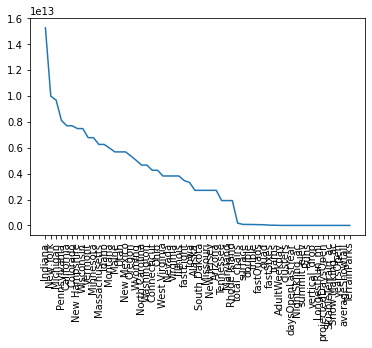

In [49]:
plt.plot(mod1_df)
plt.xticks(rotation=90)
plt.show()

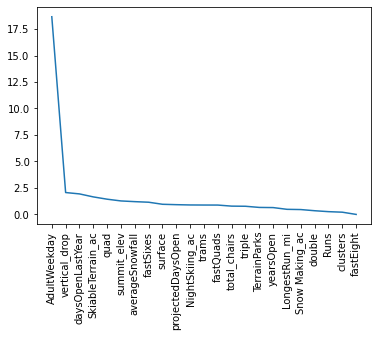

In [50]:
plt.plot(mod2_df)
plt.xticks(rotation=90)
plt.show()

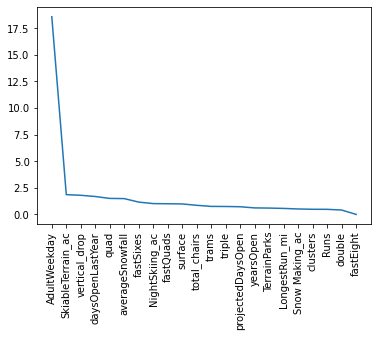

In [51]:
plt.plot(mod3_df)
plt.xticks(rotation=90)
plt.show()

| Model | Explained Variance| Mean Absolute Error|Features Dropped|
| --- | --- | --- | --- |
| model 1: mod1_df | -3.837566515588739e+25 | 22209718589431.203 |-|
| model 2: mod2_df | 0.5681345430737788 | 6.588925443611326 |'state'|
| model 3: mod3_df | 0.5495008199255342 | 7.0676194499286975 |'state','summit_elev'|